In [1]:
# Anaconda prompt에서 python -m pip install tensorflow==2.13.0

# tensorflow 
: 머신러닝과 딥러닝을 위한 오픈소스 라이브러리
- tensorflow는 Tensor 객체를 사용한다. (배열이나 행렬의 특수한 형태)

- pytorch : 동적 그래프 구조 (모델을 즉시 실행) - 디버깅이 쉽지만 실행 속도가 느릴 수 있다.
- tensorflow : 정적 그래프 구조 (모델을 정의한 후 실행) - 실행 속도가 빠르다. 디버깅이 어려울 수 있다.

- pytorch(빠른 프로토타입) < tensorflow(대규모 프로젝트, GPU 가속화 지원, 오픈 소스 프로젝트)

In [2]:
from tensorflow.keras.datasets import mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

# 신경망 구조
model = keras.Sequential([ # Keras에서 제공하는 신경망 모델 생성 함수
    layers.Dense(512, activation='relu'), # Dense layer(완전 연결 계층) 512개의 뉴런, 활성화 함수는 ReLU 함수
    layers.Dense(10, activation='softmax') # Dense layer 10개의 뉴런, 활성화함수는 softmax 함수
])

In [11]:
# 컴파일 단계
# optimizer : 최적화 알고리즘 (Root Mean Square Propagation : 적응형 학습)
# loss : 손실 함수 (sparse_categorical_crossentropy : 정수 레이블)
# merics : 성능 지표 (정확도)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# 이미지 데이터
train_images = train_images.reshape((60000, 28*28)) # 2차원 이미지를 1차원 벡터로 변환
train_images = train_images.astype('float32') / 255 # 픽셀 값을 0 ~ 1까지의 실수로 정규화
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [13]:
# 모델 훈련
# epochs : 전체 데이터 셋을 몇 번 반복 학습할 것인지
# batch_size : 한번 학습에 몇 개의 샘플을 사용할 것인지
model.fit(train_images, train_labels, epochs=5, batch_size=128) 

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2516 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1025 - accuracy: 0.9699
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0679 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0374 - accuracy: 0.9883


In [14]:
# 예측
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 45ms/step


array([1.5125021e-08, 1.1281274e-10, 8.7930539e-06, 1.8440527e-04,
       1.5575114e-11, 1.4360928e-07, 4.6364041e-13, 9.9980229e-01,
       9.4928305e-07, 3.4451600e-06], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.9998023

In [17]:
test_labels[0]

7

In [18]:
# 모델 평가
# evaluate 함수 : 손실값과 정확도
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'정확도 : {test_acc}')

313/313 [==============================] - 0s 683us/step - loss: 0.0611 - accuracy: 0.9807
정확도 : 0.9807000160217285


In [19]:
# 스칼라(랭크-0 텐서) : 하나의 숫자 (1, 2.5)
# 벡터(랭크-1 텐서) : 숫자의 일차원 배열 ([1,2,3,4,5])
# 행렬(랭크-2 텐서) : 숫자의 이차원 배열 ([1,2],[3,4])
# 랭크-3 텐서 ...

In [20]:
train_images.ndim

2

In [21]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
train_images.ndim

3

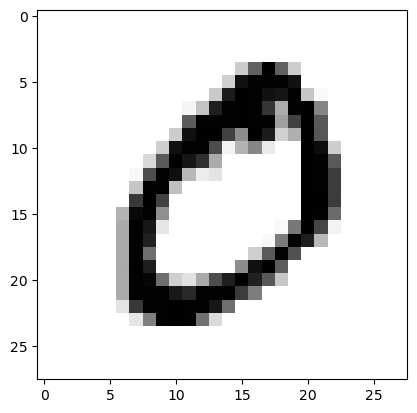

In [23]:
import matplotlib.pyplot as plt
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [24]:
import numpy as np

In [25]:
import time

In [26]:
import pandas as pd

In [27]:
train_labels[1]

0

In [28]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [29]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [31]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [32]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

In [34]:
batch = train_images[:128] # 0~127

In [35]:
batch = train_images[128:256] # 128 ~ 255

In [36]:
n = 2
batch = train_images[128 * n : 128 * (n+1)] # 256 ~ 383

In [37]:
import tensorflow as tf

x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [38]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [39]:
x = tf.random.normal(shape=(3,1), mean=0, stddev=1)
print(x)

tf.Tensor(
[[-0.24588989]
 [ 0.7118738 ]
 [ 0.29140806]], shape=(3, 1), dtype=float32)


In [40]:
x = tf.random.uniform(shape=(3,1), minval=0, maxval=1) # 0 ~ 1 사이의 균일 분포 난수
print(x)

tf.Tensor(
[[0.34668243]
 [0.4962486 ]
 [0.20709848]], shape=(3, 1), dtype=float32)


In [41]:
import numpy as np

x = np.ones(shape=(2,2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [42]:
# 텐서플로 변수
v = tf.Variable(initial_value = tf.random.normal(shape=(2,2)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.28070304,  1.4693279 ],
       [-1.6149826 , -1.2590082 ]], dtype=float32)>


In [43]:
# 텐서플로 변수에 값 할당
v.assign(x) 

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[0., 1.],
       [1., 1.]], dtype=float32)>

In [44]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [45]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [46]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [47]:
a = tf.ones((2,2))
b = tf.square(a) # 제곱
c = tf.sqrt(a) # 루트
d = b + c
e = tf.matmul(a,b) # 행렬 곱
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [48]:
# 두 개의 2차원 텐서를 더하는 구현
def naive_add(x, y):
    assert len(x.shape) == 2 # 행렬이 2차원인지?
    assert x.shape == y.shape # x와 y의 크기가 동일한지?
    x = x.copy() # 원본 데이터가 변경되지 않도록
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i,j]

    return x

In [49]:
# ReLU 활성화 함수 구현
def naive_relu(x):
    assert len(x.shape) == 2 # 예외처리
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0) # 0보다 작으면 0, 크면 그대로 유지

    return x

In [50]:
import time

x = np.random.random((20,100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)

print("걸린 시간 : {0:.2f} s".format(time.time() - t0))

걸린 시간 : 0.01 s


In [51]:
t0 = time.time()

for _ in range(1000):
    z = naive_add(x,y)
    z = naive_relu(x)

print("걸린 시간 : {0:.2f} s".format(time.time() - t0))

걸린 시간 : 1.24 s


### 텐서의 기하학적 해석

- 딥러닝 모델을 다양한 층으로 구성된 신경망 구조를 가지고 있다.
- 신경망 엔진 : 그레디언트 기반 최적화 (보통 경사 하강법)
- 텐서 연산의 도함수 : 그레디언트로 표현된다.

In [52]:
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2*x+3

grad = tape.gradient(y,x)
grad

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [53]:
x = tf.Variable(tf.zeros((2,2)))
with tf.GradientTape() as tape:
    y = 2*x + 3

grad = tape.gradient(y,x)
grad

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [54]:
W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2,2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b

grad = tape.gradient(y, [W,b])
grad

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.9853269 , 0.9853269 ],
        [0.81287825, 0.81287825]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [55]:
# 그레이드언트 중첩
# 물체의 운동을 계산하는 예제
time = tf.Variable(0.) # 시간
with tf.GradientTape() as outer_tape: # speed, acceleration
    with tf.GradientTape() as inner_tape: # position
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time) # 위치에 대해 미분하여 속도
acceleration = outer_tape.gradient(speed, time) # 속도에 대해 미분하여 가속도
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

# 텐서플로 선형분류

In [56]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal( # multivariate_normal : 2차원 정규분포
    mean=[0,3], # 평균 좌표 (0, 3)
    cov=[[1,0.5], [0.5,1]], # 공분산 행렬
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5], [0.5,1]],
    size=num_samples_per_class)

In [57]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [58]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype= 'float32')))

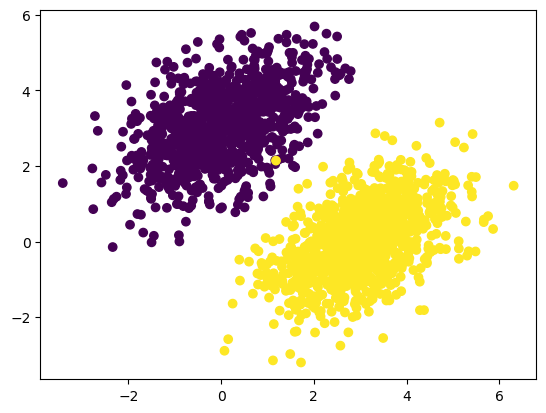

In [59]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.show()

In [60]:
# 선형분류기 변수
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) # 가중치 행렬
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,))) # 편향 벡터

In [61]:
def model(inputs): # 선형회귀 모델 forward (w*x + b)
    return tf.matmul(inputs, W) + b # 선형 변환

In [62]:
# 평균 제곱 오차 손실 함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) # 각 샘플의 손실 계산
    return tf.reduce_mean(per_sample_losses) # 전체 손실의 평균

In [63]:
# 훈련 함수
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # 가중치 행렬 W, 편향 벡터 b에 대한 손실함수의 그래디언트를 계산
    W.assign_sub(grad_loss_wrt_W * learning_rate) # 경사하강법으로 가중치 업데이트
    b.assign_sub(grad_loss_wrt_b * learning_rate) # 경사하강법으로 편향 업데이트
    return loss

In [64]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'{step}번째 스텝의 손실 : {loss:.4f}')

0번째 스텝의 손실 : 1.1608
1번째 스텝의 손실 : 0.1085
2번째 스텝의 손실 : 0.0862
3번째 스텝의 손실 : 0.0790
4번째 스텝의 손실 : 0.0742
5번째 스텝의 손실 : 0.0701
6번째 스텝의 손실 : 0.0664
7번째 스텝의 손실 : 0.0629
8번째 스텝의 손실 : 0.0598
9번째 스텝의 손실 : 0.0569
10번째 스텝의 손실 : 0.0543
11번째 스텝의 손실 : 0.0518
12번째 스텝의 손실 : 0.0496
13번째 스텝의 손실 : 0.0476
14번째 스텝의 손실 : 0.0457
15번째 스텝의 손실 : 0.0440
16번째 스텝의 손실 : 0.0424
17번째 스텝의 손실 : 0.0409
18번째 스텝의 손실 : 0.0396
19번째 스텝의 손실 : 0.0384
20번째 스텝의 손실 : 0.0373
21번째 스텝의 손실 : 0.0362
22번째 스텝의 손실 : 0.0353
23번째 스텝의 손실 : 0.0344
24번째 스텝의 손실 : 0.0336
25번째 스텝의 손실 : 0.0329
26번째 스텝의 손실 : 0.0322
27번째 스텝의 손실 : 0.0316
28번째 스텝의 손실 : 0.0310
29번째 스텝의 손실 : 0.0305
30번째 스텝의 손실 : 0.0300
31번째 스텝의 손실 : 0.0296
32번째 스텝의 손실 : 0.0292
33번째 스텝의 손실 : 0.0288
34번째 스텝의 손실 : 0.0285
35번째 스텝의 손실 : 0.0282
36번째 스텝의 손실 : 0.0279
37번째 스텝의 손실 : 0.0276
38번째 스텝의 손실 : 0.0274
39번째 스텝의 손실 : 0.0272


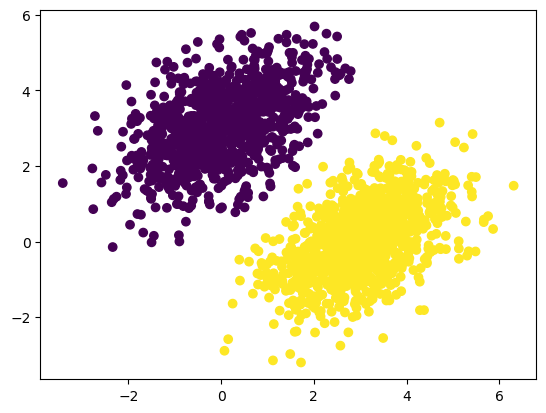

In [65]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0] > 0.5)
plt.show()

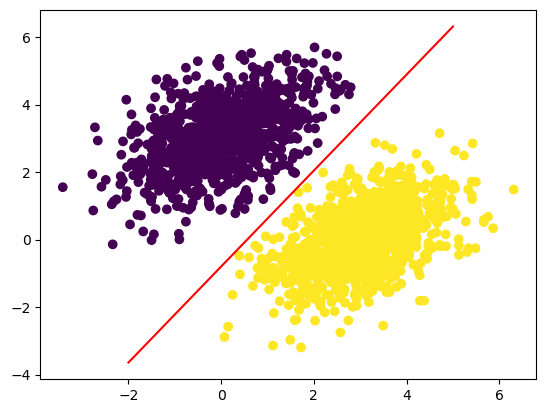

In [66]:
x = np.linspace(-2, 5, 100) # x = [-2,4]

y = - W[0] / W[1] * x + (0.5 - b) / W[1] # 기울기 : -w[0]/w[1], 절편 : (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [67]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer): # keras의 Layer를 사용하여 사용자 완전 연결 계층 만든다.
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units # 출력 차원의 크기
        self.activation = activation # 활성화 함수

    def build(self, input_shape): # 가중치 텐서 생성
        input_dim = input_shape[-1] # 입력데이터 형태
        self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal') # 랜덤 초기화된 가중치 텐서
        self.b = self.add_weight(shape=(self.units,), initializer='zeros') # 0으로 초기화된 편향 벡터

    def call(self, inputs): # forward 연산
        y = tf.matmul(inputs, self.W) + self.b # 연결 계층 연산
        if self.activation is not None:
            y = self.activation(y) # 활성화 함수 적용
        return y

In [68]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
# my_dense.build(input_tensor.shape)
output_tensor = my_dense(input_tensor)
print(output_tensor)

tf.Tensor(
[[0.         0.         0.         0.20058262 0.97729087 0.
  0.         0.         0.6808927  0.5066592  2.513493   0.
  0.18004084 0.06598545 0.23801076 1.5622213  0.         0.
  1.1805798  0.         0.         1.0416191  2.7088675  0.
  0.         0.9505515  1.2549725  0.02345276 1.0618289  2.1479144
  0.         0.00467604]
 [0.         0.         0.         0.20058262 0.97729087 0.
  0.         0.         0.6808927  0.5066592  2.513493   0.
  0.18004084 0.06598545 0.23801076 1.5622213  0.         0.
  1.1805798  0.         0.         1.0416191  2.7088675  0.
  0.         0.9505515  1.2549725  0.02345276 1.0618289  2.1479144
  0.         0.00467604]], shape=(2, 32), dtype=float32)


In [69]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')

In [70]:
from tensorflow.keras import models
model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)
])

In [71]:
model = keras.Sequential([
    SimpleDense(32, activation='relu'),
    SimpleDense(64, activation='relu'),
    SimpleDense(32, activation='softmax'),
    SimpleDense(32, activation='softmax')
])

In [72]:
# 컴파일
model = keras.Sequential([keras.layers.Dense(1)])

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

In [73]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.BinaryAccuracy()])

In [74]:
h = model.fit(inputs, targets, epochs=5, batch_size=128)

Epoch 1/5
16/16 [==============================] - 0s 669us/step - loss: 15.4516 - binary_accuracy: 0.5170
Epoch 2/5
16/16 [==============================] - 0s 538us/step - loss: 14.8148 - binary_accuracy: 0.5175
Epoch 3/5
16/16 [==============================] - 0s 759us/step - loss: 14.2789 - binary_accuracy: 0.5185
Epoch 4/5
16/16 [==============================] - 0s 523us/step - loss: 13.7570 - binary_accuracy: 0.5195
Epoch 5/5
16/16 [==============================] - 0s 504us/step - loss: 13.2487 - binary_accuracy: 0.5215


In [75]:
h.history

{'loss': [15.451570510864258,
  14.814787864685059,
  14.27894115447998,
  13.757011413574219,
  13.248716354370117],
 'binary_accuracy': [0.5170000195503235,
  0.5174999833106995,
  0.5184999704360962,
  0.5195000171661377,
  0.5214999914169312]}

In [76]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [77]:
indices_permutation = np.random.permutation(len(inputs)) # 입력 데이터 무작위로 섞기
shuffled_inputs = inputs[indices_permutation] # 입력 데이터 재배열
shuffled_targets = targets[indices_permutation] # 타겟 데이터 재배열

num_validation_samples = int(0.3*len(inputs)) # 30%를 검증 데이터로 사용
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

In [78]:
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size = 16,
    validation_data=(val_inputs, val_targets) # 검증 데이터와 타겟 데이터를 모델의 성능 평가
)

Epoch 1/5
88/88 [==============================] - 0s 1ms/step - loss: 0.3743 - binary_accuracy: 0.8864 - val_loss: 0.0362 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 735us/step - loss: 0.0706 - binary_accuracy: 0.9600 - val_loss: 0.1999 - val_binary_accuracy: 0.7950
Epoch 3/5
88/88 [==============================] - 0s 794us/step - loss: 0.0808 - binary_accuracy: 0.9593 - val_loss: 0.0492 - val_binary_accuracy: 0.9817
Epoch 4/5
88/88 [==============================] - 0s 787us/step - loss: 0.0692 - binary_accuracy: 0.9571 - val_loss: 0.1711 - val_binary_accuracy: 0.8183
Epoch 5/5
88/88 [==============================] - 0s 801us/step - loss: 0.0741 - binary_accuracy: 0.9543 - val_loss: 0.3004 - val_binary_accuracy: 0.6800


In [79]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 626us/step
[[1.2717876 ]
 [0.3514012 ]
 [1.2569952 ]
 [0.99016154]
 [1.0320382 ]
 [0.8799784 ]
 [0.47002208]
 [1.1964737 ]
 [1.4902565 ]
 [1.0366908 ]]
